In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-account-fraud-dataset-neurips-2022/Base.csv
/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant IV.csv
/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant V.csv
/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant I.csv
/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant III.csv
/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant II.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/kaggle/input/bank-account-fraud-dataset-neurips-2022/Base.csv")
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [5]:
df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [7]:
df.isnull().sum().sort_values(ascending=False).head(10)

fraud_bool                   0
income                       0
device_fraud_count           0
device_distinct_emails_8w    0
keep_alive_session           0
device_os                    0
session_length_in_minutes    0
source                       0
foreign_request              0
proposed_credit_limit        0
dtype: int64

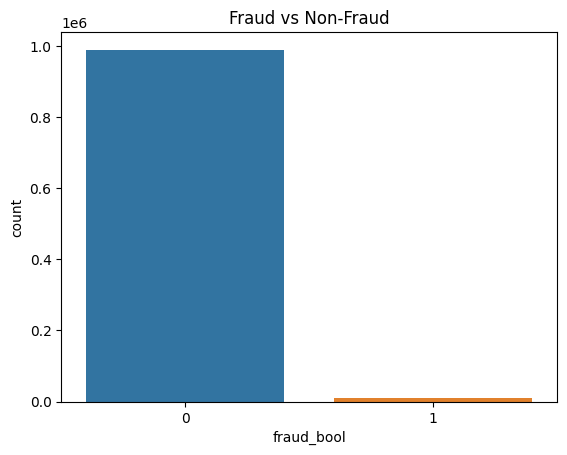

In [8]:
# Fraud target variable distribution
sns.countplot(x='fraud_bool', data=df)
plt.title("Fraud vs Non-Fraud")
plt.show()

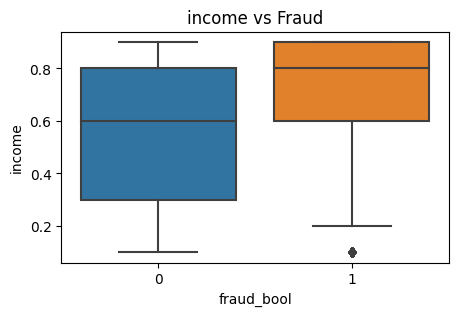

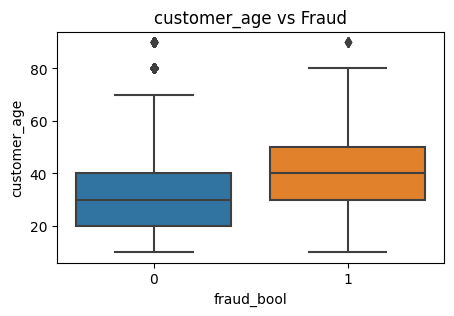

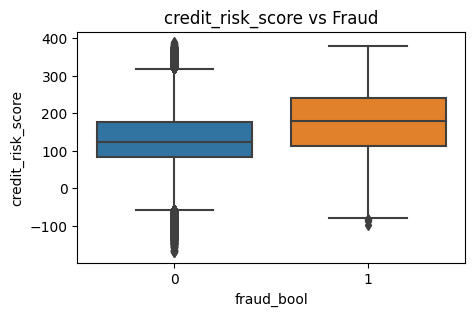

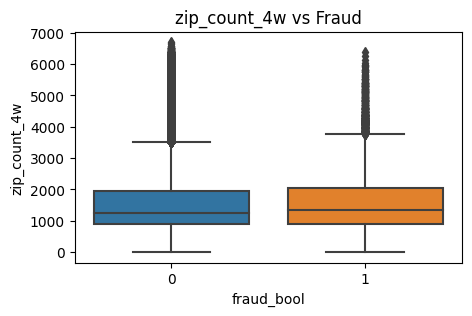

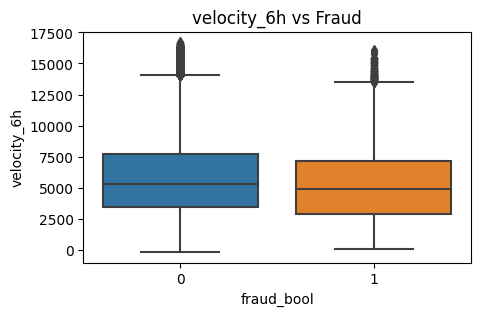

In [9]:
# Plot numeric features against fraud_bool
num_cols = ['income', 'customer_age', 'credit_risk_score', 'zip_count_4w', 'velocity_6h']
for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x='fraud_bool', y=col, data=df)
    plt.title(f"{col} vs Fraud")
    plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder

df = df.drop(columns=['source'])  # high cardinality text column

# Encode categoricals
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Fill missing with median
df.fillna(df.median(numeric_only=True), inplace=True)

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='fraud_bool')
y = df['fraud_bool']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train model
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 8920, number of negative: 791080
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.073886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3211
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.011150 -> initscore=-4.485103
[LightGBM] [Info] Start training from score -4.485103


LGBMClassifier()

In [14]:
# Predict
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

In [15]:
# Evaluation
print(confusion_matrix(y_test, y_pred))

[[197723    168]
 [  2012     97]]


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    197891
           1       0.37      0.05      0.08      2109

    accuracy                           0.99    200000
   macro avg       0.68      0.52      0.54    200000
weighted avg       0.98      0.99      0.98    200000



In [17]:
print("ROC AUC:", roc_auc_score(y_test, y_prob))

ROC AUC: 0.8944054768295066


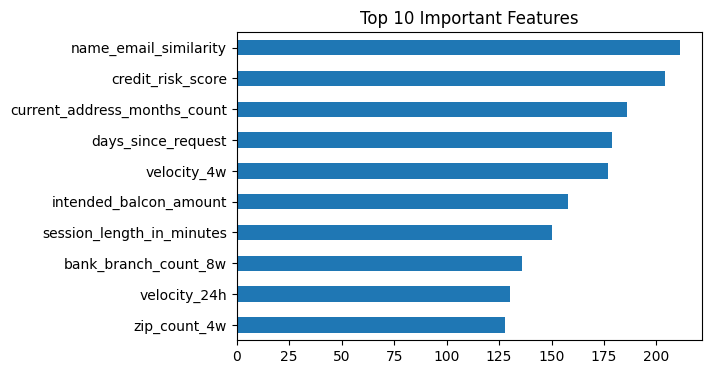

In [18]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values()
feat_imp.tail(10).plot(kind='barh', title='Top 10 Important Features', figsize=(6,4))
plt.show()